## What is feature extraction from text/ text representation/ text vectorizatoin

When we have textual data and we want to feed it into some ML/DL algorithm, the problem is that these algorithms don't understand english or any language. It only understands numbers and for that reason, we need to convert our textual data into number before feeding it into any ML/DL models. So this process of converting text to number is called feature extraction from text/ text represntation/ text vectorization

It is very difficult to represnt text in form of number as compared to something else like image or let's say audio. We know that the image is made up of pixels and each pixel has a value and the image is an array of such values. Hence we have our numeric data already present in case of images. But in case of text, it is not as straight forward.

What is the core idea ?
The core idea is such that whenever we convert any text to numbers, those numeric values should represent the semantic idea or the meaning of the text


## Techniques Used

1. One hot encoding
2. Bag of words approach(BoW)
3. n-grams
4. TF-IDF
5. Custom
6. Word2Vec(embeddings)-deep learning based

## Common terms used

1. **Corpus(C):** Corpus is the combination of all the words present in the enitre dataset. For example if we have some reviews dataset without around 10000 reviews, then the corpous will be all the reviews text combined together i.e all the words present in the entire dataset

2. **Vocabulary(V)**: Vocabulary is the unique words which make up the entire corpus. In the corpus we will definetely have alot of repeating words, but the unique words are the vocabulary

3. **Document(D)**: Each individual data row(in our example case, each individual review) is called a document

4. **Word(W):** Individual words of each document is called word


# One-hot encoding approach

In this approach, we first find the vocabulary of the corpus. Then we convert each document in the dimension of the vocabulary. For example if our vocabulary is of size 5, then the dimension of matrix will be (countOfWords,VocabularyDimension). Each document will be converted to this form of matrix where each word will have 1's and 0's. 1 will be present for that word and 0 for others. 

Advantages: 
1.Easy to Understand(Intuitive)
2. Easy to implement

Disadvantages:
1. Sparsity: As we have 1 for only the current word and rest 0's in the matrix, it creates a sparse matrix where there are alot of 0's(count of 0's will be total to the size of vocabulary). Such sparse matrix is very difficult to handle.
2. No fixed size: The input dimension must be same for a machine learning model. In our case the input dimension is (countOfWords,VocabularyDimension). So if the countOfWords is not same in each document, then we won't be able to give input to the machine learnig model and hence it is completely useless.
3. OOV(Out of Vocabulary): Suppose we have trained our model on some vocabulary and when testing in real world, we get some word which was not in our vocabulary, then there is no way for us to convert it to numeric form and hence we will not be able to make any predictions
4. No capturing of Semantic: This method does not capture the inherent meaning of the text 

Due to all these above disadvanges, in today's world, One Hot Encoding is not used in any applications

# Bag of Words(BoW)

It is used alot in text classification applications

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

    A vocabulary of known words.
    A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

The intuition is that documents are similar if they have similar content.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [1]:
import numpy as np
import pandas as pd

In [12]:
df = pd.DataFrame({'text':['Devang watches youtube','Devang comments video','people watch youtube','people post post'],'output':[1,0,1,0]})
df

,text,output
0,Devang watches youtube,1
1,Devang comments video,0
2,people watch youtube,1
3,people post post,0


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # here in the hyperparameters, we can set binary=True, so that in the output we will have 1 if the word occurs else 0
#(as opposed to if binary=False then it will show the frequence of the occurance of the word)

In [14]:
bow = cv.fit_transform(df['text'])

In [15]:
# print the vocabulary
print(cv.vocabulary_)

{'devang': 1, 'watches': 6, 'youtube': 7, 'comments': 0, 'video': 4, 'people': 2, 'watch': 5, 'post': 3}


In [16]:
print(bow[0].toarray())
# from the output we can tell how the numbers are assigned. In the first document we have 3 words "Devang watches youtube".
# hence we have 1 at the index position where we have those words and 0 for all the other words in the vocabulary

[[0 1 0 0 0 0 1 1]]


In [17]:
print(bow[1].toarray())


[[1 1 0 0 1 0 0 0]]


In [18]:
print(bow[3].toarray())


[[0 0 1 2 0 0 0 0]]


In [20]:
# suppose we take some other text
cv.transform(["Devang watches youtube and comments"]).toarray()
# here we can see that BoW approach is handling the problem of Out of Vocabulary

array([[1, 1, 0, 0, 0, 0, 1, 1]])

### Advantages and Disadvantages of BoW

Advantages:
1. Simple and intuitive to understand
2. Solves the fixed size problem in the One-hot-encoding method.

Disadvantages:
1. Sparsity: Again, there will be alot of zeros in the matrix and hence the problem of overfitting
2. Out of vocabulary: Here we are completely ignoring the OOV word which might be useful
3. Ordering is not considerd which is an issue

# N-Grams

It is similar to bag of words approach. In N-Grams, rather than taking single words in vocabulary, we take a combination of n-words to form our vocabulary.
For example, we are making bi-gram, then rather than taking one word, we take 2 words in the vocabulary. Similarly for tri-grams,quad-grams and so on.
Bag of words is a special case of n-grams where n=1 or uni-grams

N-grams are continuous sequences of words or symbols, or tokens in a document. In technical terms, they can be defined as the neighboring sequences of items in a document.

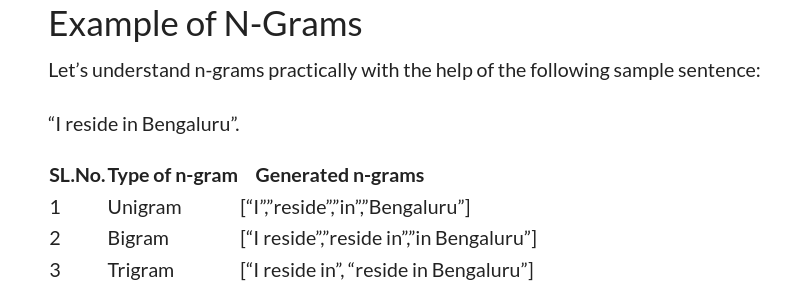


why we need many different types of n-grams?! This is because different types of n-grams are suitable for different types of applications. You should try different n-grams on your data in order to confidently conclude which one works the best among all for your text analysis. For instance, research has substantiated that trigrams and 4 grams work the best in the case of spam filtering.

In [21]:
df = pd.DataFrame({'text':['Devang watches youtube','Devang comments video','people watch youtube','people post post'],'output':[1,0,1,0]})
df

,text,output
0,Devang watches youtube,1
1,Devang comments video,0
2,people watch youtube,1
3,people post post,0


In [24]:
cv = CountVectorizer(ngram_range=(2,2)) # here 2,2 means bigram. If we write 1,2 then our vocabulary will contain both unigram and bigram.
bow = cv.fit_transform(df['text'])

In [25]:
print(cv.vocabulary_)


{'devang': 2, 'watches': 13, 'youtube': 15, 'devang watches': 4, 'watches youtube': 14, 'comments': 0, 'video': 10, 'devang comments': 3, 'comments video': 1, 'people': 5, 'watch': 11, 'people watch': 7, 'watch youtube': 12, 'post': 8, 'people post': 6, 'post post': 9}


### Advantages and Disadvantages of N-grams

Advantages
1. Able to capture semantic meaning of the sentence.
2. Simple and intutive to understand

Disadvantages
1. As we increase value of n, the dimensionality increases which increases complexity and more time in model training.
2. Still no solution for out of vocabulary. We still ignore the OOV words

# TF-IDF (Team Frequency-Inverse Document Frequency)

It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus).   

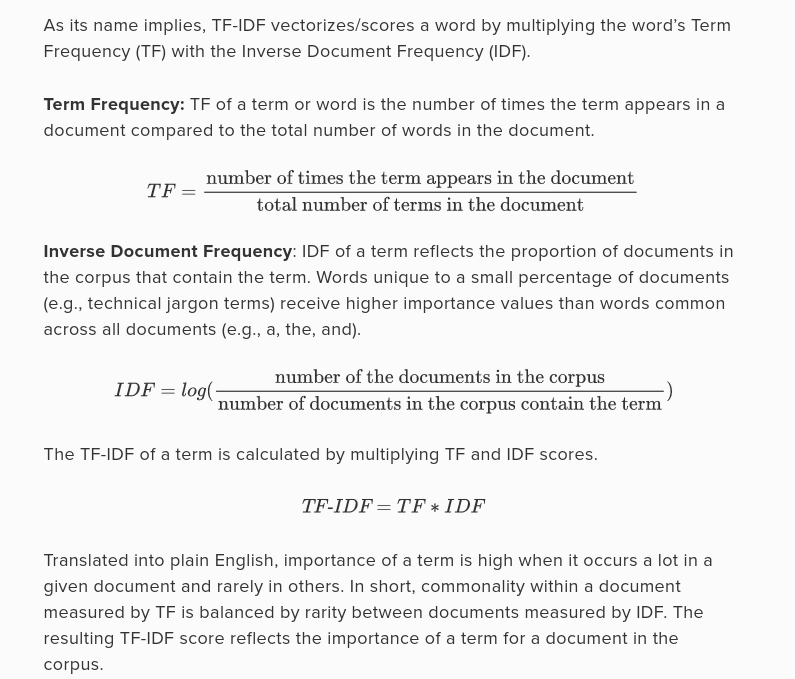

In [27]:
df

,text,output
0,Devang watches youtube,1
1,Devang comments video,0
2,people watch youtube,1
3,people post post,0


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

tfidf.fit_transform(df['text']).toarray() 

array([[0.        , 0.52640543, 0.        , 0.        , 0.        ,
        0.        , 0.66767854, 0.52640543],
       [0.61761437, 0.48693426, 0.        , 0.        , 0.61761437,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.52640543, 0.        , 0.        ,
        0.66767854, 0.        , 0.52640543],
       [0.        , 0.        , 0.36673901, 0.93032387, 0.        ,
        0.        , 0.        , 0.        ]])

In [30]:
# the idf value for each term is constant. the tearm frequency changes with the document
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

[1.91629073 1.51082562 1.51082562 1.91629073 1.91629073 1.91629073
 1.91629073 1.51082562]
['comments' 'devang' 'people' 'post' 'video' 'watch' 'watches' 'youtube']


**Question: Why do we take log while calculating IDF**
IDF uses a logarithm to scale down the impact of the term frequency. The logarithm helps to prevent the overwhelming influence of very frequent terms and gives more balanced importance to less frequent but still significant terms.

For example the word "the" occurs in all the documents. hence its IDF=1(without considering log), and IDF will be 0(with considering log)

For example the word "encyclopedia" occurs in only one document(out of 10000). hence its IDF=10000(without considering log), and IDF will be 4(with taking log in consideration)
hence without log, the IDF term will dominate the TF and hence TF will be practically useless and will have no meaning. 

### Advantages and Disadvantages

Advantages:

1. Used alot in information retrival systems such as search engines.

Disadvantages

1. Sparsity
2. Huge Dimension
3. OOV(Out of Vocabulary)
4. Difficult to capture semantic relationships

All these problems will be handled using Word2Vec.